TUGAS PROYEK BDA

Athalia Malika Najah

1301213226

**Penerapan algoritma apriori dan association model terhadap dataset online retail untuk memprediksi kecenderungan memilih produk yang serupa**

---



Import lib

In [ ]:
#importing the libraries

import pandas as pd
import numpy as np

import time, warnings
import datetime as dt

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns


#algorithm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read data
df = pd.read_csv('online_retail.csv')

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
105919,545301,POST,POSTAGE,4.0,2011-03-01 12:26:00,18.00,12679.0,France
105920,545301,22089,PAPER BUNTING VINTAGE PAISLEY,6.0,2011-03-01 12:26:00,2.95,12679.0,France
105921,545301,22090,PAPER BUNTING RETROSPOT,6.0,2011-03-01 12:26:00,2.95,12679.0,France
105922,545301,22432,WATERING CAN PINK BUNNY,8.0,2011-03-01 12:26:00,1.95,12679.0,France
105923,545301,22433,WATERI,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
105015,545216,22199,FRYING PAN RED RETROSPOT,1.0,2011-02-28 16:50:00,8.29,NaN,United Kingdom
48349,540468,85202,HANGING WOOD AND FELT HEART,14.0,2011-01-07 13:55:00,0.43,NaN,United Kingdom
33516,539261,21071,VINTAGE BILLBOARD DRINK ME MUG,12.0,2010-12-16 14:34:00,1.25,15620.0,United Kingdom
77034,542678,71496B,A4 WALL TIDY RED FLOWERS,4.0,2011-01-31 12:21:00,0.65,14688.0,United Kingdom
30639,538877,22083,PAPER CHAIN KIT RETROSPOT,15.0,2010-12-14 15:29:00,6.77,NaN,United Kingdom
26730,538520,21826,EIGHT PIECE DINOSAUR SET,2.0,2010-12-12 16:21:00,1.25,NaN,United Kingdom
34738,539423,21844,RED RETROSPOT MUG,6.0,2010-12-17 14:24:00,2.95,15811.0,United Kingdom
63875,541592,10135,COLOURING PENCILS BROWN TUBE,1.0,2011-01-19 15:08:00,1.25,NaN,United Kingdom
9359,537200,85178,VICTORIAN SEWING KIT,2.0,2010-12-05 14:17:00,1.25,15867.0,United Kingdom
58657,541258,22423,REGENCY CAKESTAND 3 TIER,1.0,2011-01-16 15:30:00,12.75,13634.0,United Kingdom


In [ ]:
df.shape

(105924, 8)

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105924 entries, 0 to 105923
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    105924 non-null  object 
 1   StockCode    105924 non-null  object 
 2   Description  105620 non-null  object 
 3   Quantity     105923 non-null  float64
 4   InvoiceDate  105923 non-null  object 
 5   UnitPrice    105923 non-null  float64
 6   CustomerID   69705 non-null   float64
 7   Country      105923 non-null  object 
dtypes: float64(3), object(5)
memory usage: 6.5+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,105923.000000,105923.000000,69705.000000
mean,8.838232,5.310059,15332.368596
std,327.037099,117.502187,1768.207282
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13854.000000
50%,3.000000,2.460000,15301.000000
75%,8.000000,4.250000,16954.000000
max,74215.000000,16888.020000,18283.000000


In [ ]:
# Calculate metrics
num_transactions = df['InvoiceNo'].nunique()
num_products = df['Description'].nunique()
num_customers = df['CustomerID'].nunique()

# Print metrics
print("Number of transactions: ", num_transactions)
print("Number of products bought: ", num_products)
print("Number of customers: ", num_customers)

Number of transactions:  4925
Number of products bought:  3065
Number of customers:  1761


In [ ]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      304
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     36219
Country            1
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Menggunakan data dengan nilai positif saja

In [ ]:
data=df[df['Quantity']>0]
data.describe()

,Quantity,UnitPrice,CustomerID
count,67899.000000,67899.000000,67899.000000
mean,13.756565,3.148640,15341.934255
std,288.924659,5.271607,1768.855262
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13869.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,16985.000000
max,74215.000000,320.690000,18283.000000


In [ ]:
data['YearMonth'] = data['InvoiceDate'].map(lambda x: 100*x.year + x.month)
data['AllPrice']= data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,AllPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


                             Description  Quantity
1459      MEDIUM CERAMIC TOP STORAGE JAR   74215.0
2671  WHITE HANGING HEART T-LIGHT HOLDER   10931.0
2736   WORLD WAR 2 GLIDERS ASSTD DESIGNS   10084.0
1667     PACK OF 72 RETROSPOT CAKE CASES    8933.0
1307             JUMBO BAG RED RETROSPOT    7822.0


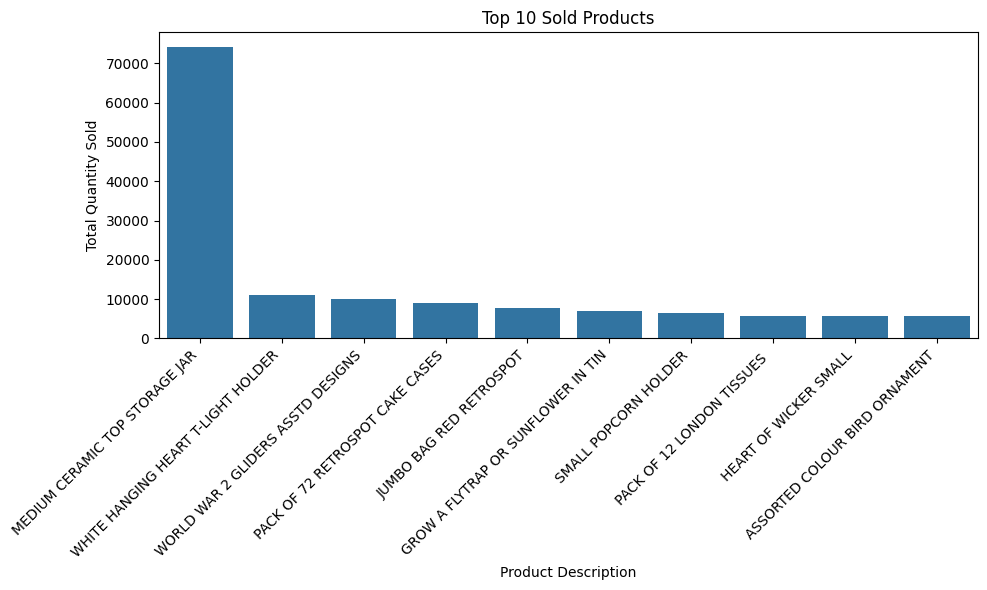

In [ ]:
# Group by 'Description' and sum 'Quantity' to get total sold for each product
top_sold_products = data.groupby('Description')['Quantity'].sum().reset_index()

# Sort by total quantity sold in descending order
top_sold_products = top_sold_products.sort_values(by='Quantity', ascending=False)

# Display the top sold products to verify
print(top_sold_products.head())

# Plotting top sold products
plt.figure(figsize=(10, 6))
sns.barplot(x='Description', y='Quantity', data=top_sold_products.head(10))
plt.title('Top 10 Sold Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


      CustomerID  AllPrice
0        12346.0  77183.60
676      14646.0  57866.02
1648     18102.0  38370.09
528      14156.0  25752.25
971      15749.0  22998.40


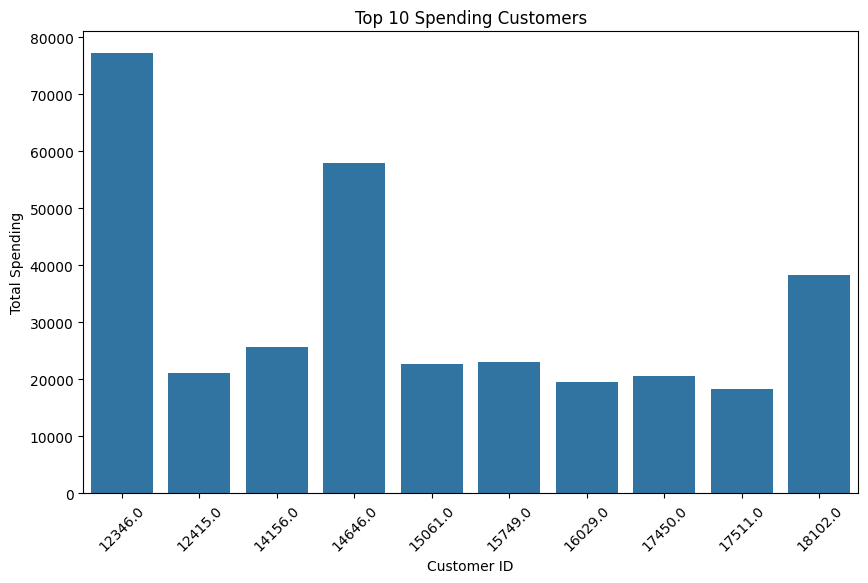

In [ ]:
# Group by 'CustomerID' and sum 'TotalPrice' to get total spending for each customer
top_spending_customers = data.groupby('CustomerID')['AllPrice'].sum().reset_index()

# Sort by total spending in descending order
top_spending_customers = top_spending_customers.sort_values(by='AllPrice', ascending=False)
print(top_spending_customers.head())

# Plotting top spending customers
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='AllPrice', data=top_spending_customers.head(10))
plt.title('Top 10 Spending Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Total revenue
total_revenue = data['AllPrice'].sum()
print("\nTotal Revenue:", total_revenue)


Total Revenue: 1601541.75


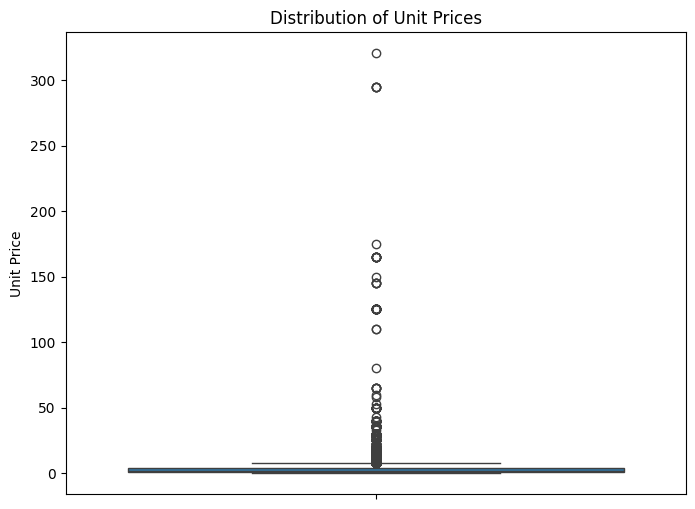

In [ ]:
import seaborn as sns

# Calculate average unit price
average_unit_price = data['UnitPrice'].mean()

# Plotting box plot for unit prices
plt.figure(figsize=(8, 6))
sns.boxplot(data['UnitPrice'], orient='v')
plt.title('Distribution of Unit Prices')
plt.ylabel('Unit Price')
plt.show()


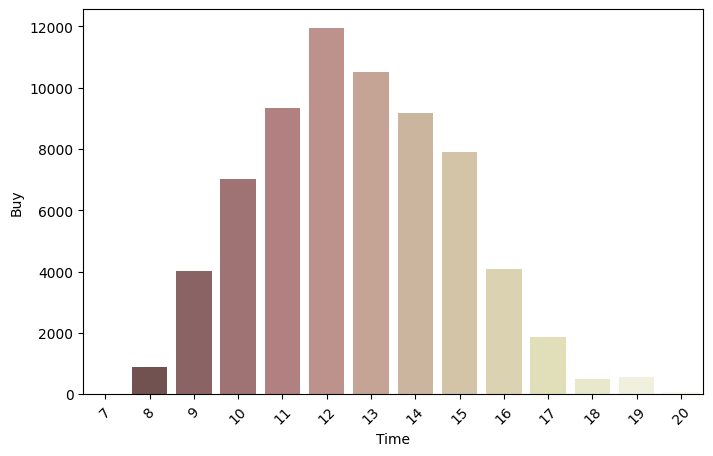

In [ ]:
hour=data.set_index('InvoiceDate').groupby(lambda date: date.hour).count()['CustomerID']
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x = hour.index, y = hour.values, palette = 'pink')
plt.xlabel("Time")
plt.ylabel("Buy")
plt.xticks(rotation=45)
plt.show()

Observasi:
- Dari grafik dapat disimpulkan bahwa jam paling sibuk dalam sehari adalah antara pukul 10:00 pagi hingga 15:00 siang.
- Sehingga, retail dapat membuat strategi untuk meningkatkan penjualan.

**Membuat Keranjang**

In [ ]:
data1= (data[data['Country']=='United Kingdom'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
data1.head(5)

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Encode Data**

In [ ]:
def encode(i):
    if i <= 0:
        return 0
    if i >= 1:
        return 1
data_encode = data1.applymap(encode)
data_encode

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Filter Data**

In [ ]:
data_filter=data_encode[(data_encode>0).sum(axis=1)>=2]
data_filter

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Algoritma Apriori**

In [ ]:
# Finding frequent itemsets with Apriori algorithm
frequent_itemset = apriori(data_filter, min_support=0.02, use_colnames=True)

# Sorting itemsets by support in descending order
frequent_itemset = frequent_itemset.sort_values('support', ascending=False).reset_index(drop=True)

# Adding a column to calculate the length of each itemset
frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x: len(x))

# Displaying the frequent itemsets
frequent_itemset


,support,itemsets,length
0,0.162947,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.106978,(HEART OF WICKER SMALL),1
2,0.106624,(REGENCY CAKESTAND 3 TIER),1
3,0.093872,(HEART OF WICKER LARGE),1
4,0.093518,(SET OF 3 CAKE TINS PANTRY DESIGN ),1
...,...,...,...
308,0.020191,(PLASTERS IN TIN CIRCUS PARADE ),1
309,0.020191,(BAKING MOULD HEART WHITE CHOCOLATE),1
310,0.020191,(PAINTED METAL PEARS ASSORTED),1
311,0.020191,(SAVE THE PLANET MUG),1


**Association Model**

In [ ]:
# Generating association rules based on frequent itemsets using lift metric
association_rules(frequent_itemset, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.026922,0.029401,0.021962,0.815789,27.746671,0.021171,5.268964,0.990629
1,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM ),0.029401,0.026922,0.021962,0.746988,27.746671,0.021171,3.845976,0.993160
2,(BLUE 3 PIECE POLKADOT CUTLERY SET),(PINK 3 PIECE POLKADOT CUTLERY SET),0.027984,0.030464,0.021608,0.772152,25.346335,0.020756,4.255186,0.988201
3,(PINK 3 PIECE POLKADOT CUTLERY SET),(BLUE 3 PIECE POLKADOT CUTLERY SET),0.030464,0.027984,0.021608,0.709302,25.346335,0.020756,3.343734,0.990728
4,(FELTCRAFT CUSHION BUTTERFLY),(FELTCRAFT CUSHION RABBIT),0.027984,0.032235,0.021254,0.759494,23.560996,0.020352,4.023864,0.985125
...,...,...,...,...,...,...,...,...,...,...
103,(NATURAL SLATE HEART CHALKBOARD ),(WHITE HANGING HEART T-LIGHT HOLDER),0.079348,0.162947,0.026213,0.330357,2.027387,0.013284,1.249999,0.550430
104,(PLEASE ONE PERSON METAL SIGN),(WHITE HANGING HEART T-LIGHT HOLDER),0.064470,0.162947,0.020191,0.313187,1.922014,0.009686,1.218749,0.512771
105,(WHITE HANGING HEART T-LIGHT HOLDER),(PLEASE ONE PERSON METAL SIGN),0.162947,0.064470,0.020191,0.123913,1.922014,0.009686,1.067850,0.573097
106,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.162947,0.077223,0.024088,0.147826,1.914280,0.011505,1.082851,0.570586


Dalam analisis asosiasi menggunakan algoritma Apriori, hubungan antara antecedents (item atau produk yang terjadi sebelumnya) dan consequents (item atau produk yang terjadi sesudahnya) dievaluasi berdasarkan beberapa metrik utama seperti confidence, lift, dan support. Confidence mengukur seberapa sering consequents muncul jika antecedents sudah ada, sementara lift mengukur seberapa kuat hubungan asosiasi antara antecedents dan consequents dibandingkan dengan kejadian acak. Leverage mengukur seberapa banyak kombinasi tersebut muncul lebih dari yang diharapkan secara acak.

Dalam kasus ini, hubungan antara POPPY'S PLAYHOUSE BEDROOM dan POPPY'S PLAYHOUSE KITCHEN memiliki lift yang tinggi, menunjukkan bahwa pembelian POPPY'S PLAYHOUSE BEDROOM sering kali diikuti dengan pembelian POPPY'S PLAYHOUSE KITCHEN. Confidence yang tinggi (81.58%) menunjukkan bahwa sebagian besar transaksi yang memasukkan POPPY'S PLAYHOUSE BEDROOM juga memasukkan POPPY'S PLAYHOUSE KITCHEN. Leverage dan zhangs_metric menunjukkan bahwa kombinasi ini muncul lebih sering daripada yang diharapkan secara acak, dengan conviction yang tinggi menunjukkan bahwa pelanggan cenderung membeli kedua produk ini bersamaan.

Penerapan praktis dari analisis ini dapat membantu dalam strategi penempatan produk di toko, rekomendasi pembelian, penentuan diskon berdasarkan kombinasi pembelian, serta strategi bundling produk untuk meningkatkan penjualan dan memaksimalkan keuntungan. Dengan memahami hubungan asosiasi ini, pengecer dapat mengoptimalkan strategi pemasaran dan penjualan mereka secara lebih efektif.

**Kesimpulan**

Berdasarkan hasil analisis asosiasi yang diberikan:

**i. Penempatan Produk**
Karena lift tertinggi terjadi antara POPPY'S PLAYHOUSE BEDROOM dan POPPY'S PLAYHOUSE KITCHEN, kita dapat menempatkannya berdekatan di toko.. Selain itu, WHITE HANGING HEART T-LIGHT HOLDER dan ASSORTED COLOUR BIRD ORNAMENT juga dapat ditempatkan berdekatan untuk memanfaatkan hubungan asosiatif yang kuat antara keduanya.

**ii. Rekomendasi**
Setiap kali pelanggan memilih POPPY'S PLAYHOUSE BEDROOM bersama POPPY'S PLAYHOUSE KITCHEN, kita bisa merekomendasikan untuk membeli POPPY'S PLAYHOUSE KITCHEN juga. Begitu juga dengan WHITE HANGING HEART T-LIGHT HOLDER dan ASSORTED COLOUR BIRD ORNAMENT, yang bisa direkomendasikan bersama-sama karena hubungan asosiasi yang signifikan.



**iii. Diskon**
Ketika pelanggan membeli POPPY'S PLAYHOUSE BEDROOM, dapat diberikan diskon jika membeli POPPY'S PLAYHOUSE KITCHEN.  Demikian pula, diskon dapat diterapkan saat membeli WHITE HANGING HEART T-LIGHT HOLDER dan ASSORTED COLOUR BIRD ORNAMENT secara bersamaan.

**iv. Bundling**
Kita dapat menggabungkan produk-produk ini dalam satu paket dengan harga yang lebih rendah daripada total harga ketiganya secara terpisah, sehingga membantu meningkatkan pendapatan dan mempercepat penjualan.